# Problem Formulation

There are a lot different types and brands of wine in the supermarkets around us. With such a huge variety of choices, how can one make an informed decision to purchase fine wine without even needing to taste it?

What determines good wine? Is it possible to differentiate good and bad wine without tasting?

Problem statement: Predict the quality of wine based on its attributes that can be measured


Dataset used: Wine dataset from UCI Machine Learning Repository from https://archive.ics.uci.edu/ml/datasets/wine+quality

# Importing Essential Libraries

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling
!{sys.executable} -m pip install plotly

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.


In [8]:
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
## Reading the wine dataset

We can look at the rows and columns of this dataset to understand it better. From this, we see that the dataset consists of columns describing the various properties of each wine, such as the levels of fixed acidity, volatile acidity etc.

From the dataset, the input variables are as below:
> Predictor variables (based on physicochemical tests): <br> 1 - fixed acidity <br> 2 - volatile acidity <br> 3 - citric acid <br> 4 - residual sugar <br> 5 - chlorides <br> 6 - free sulfur dioxide <br> 7 - total sulfur dioxide <br> 8 - density <br> 9 - pH <br> 10 - sulphates <br> 11 - alcohol <br>  <br> Response variable (based on sensory data): <br> 12 - quality (integer score between 0 and 10, categorical variable)

We also note the value that we want to predict, namely quality, is a categorical variable with 11 classes (0 to 10). Hence, we have a classification problem in determining wine quality from a given set of inputs.

In [9]:
wine_data = pd.read_csv("winequality-red.csv")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This dataset originally consists of 1599 rows and 12 columns.

In [10]:
wine_data.shape

(1599, 12)

### Checking for NULL values

We also check for any NULL values, and note that there are no NULL values in the dataset.

In [11]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking for and removing duplicates
We first check for duplicates in our dataset. From below, we see that there are 240 duplicated tuples in our dataset. We can remove these duplicated entries to allow our models to be better generalised, avoiding overfitting and bias.

In [12]:
wine_data.loc[wine_data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [13]:
wine_data = wine_data.drop_duplicates()

From here, we can look at the descriptive statistics of the dataset. For each column, we now have information such as the mean, standard deviation, min and max values, and the values of each quartile.

In [14]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We plotted a bar chart to observe the number of rows in each categorical bin for quality.

We can check the value counts of the quality of our wine data. From the bar chart below, we note that the values of the 'quality' column are mostly 5 and 6. Some values, such as 1, 2, 9, and 10, are not represented in the dataset.

Text(0, 0.5, 'Count')

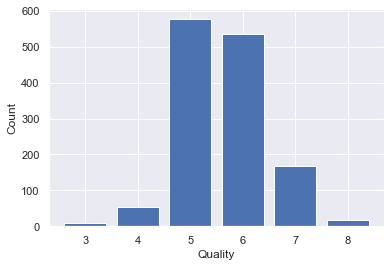

In [15]:
plt.bar(x = wine_data['quality'].value_counts().index.tolist(), 
        height = wine_data['quality'].value_counts().array)
plt.xlabel('Quality')
plt.ylabel('Count')

Below, we plotted the boxplot, histogram, and violinplot for each for the variables excluding quality, to observe their individual distribution.

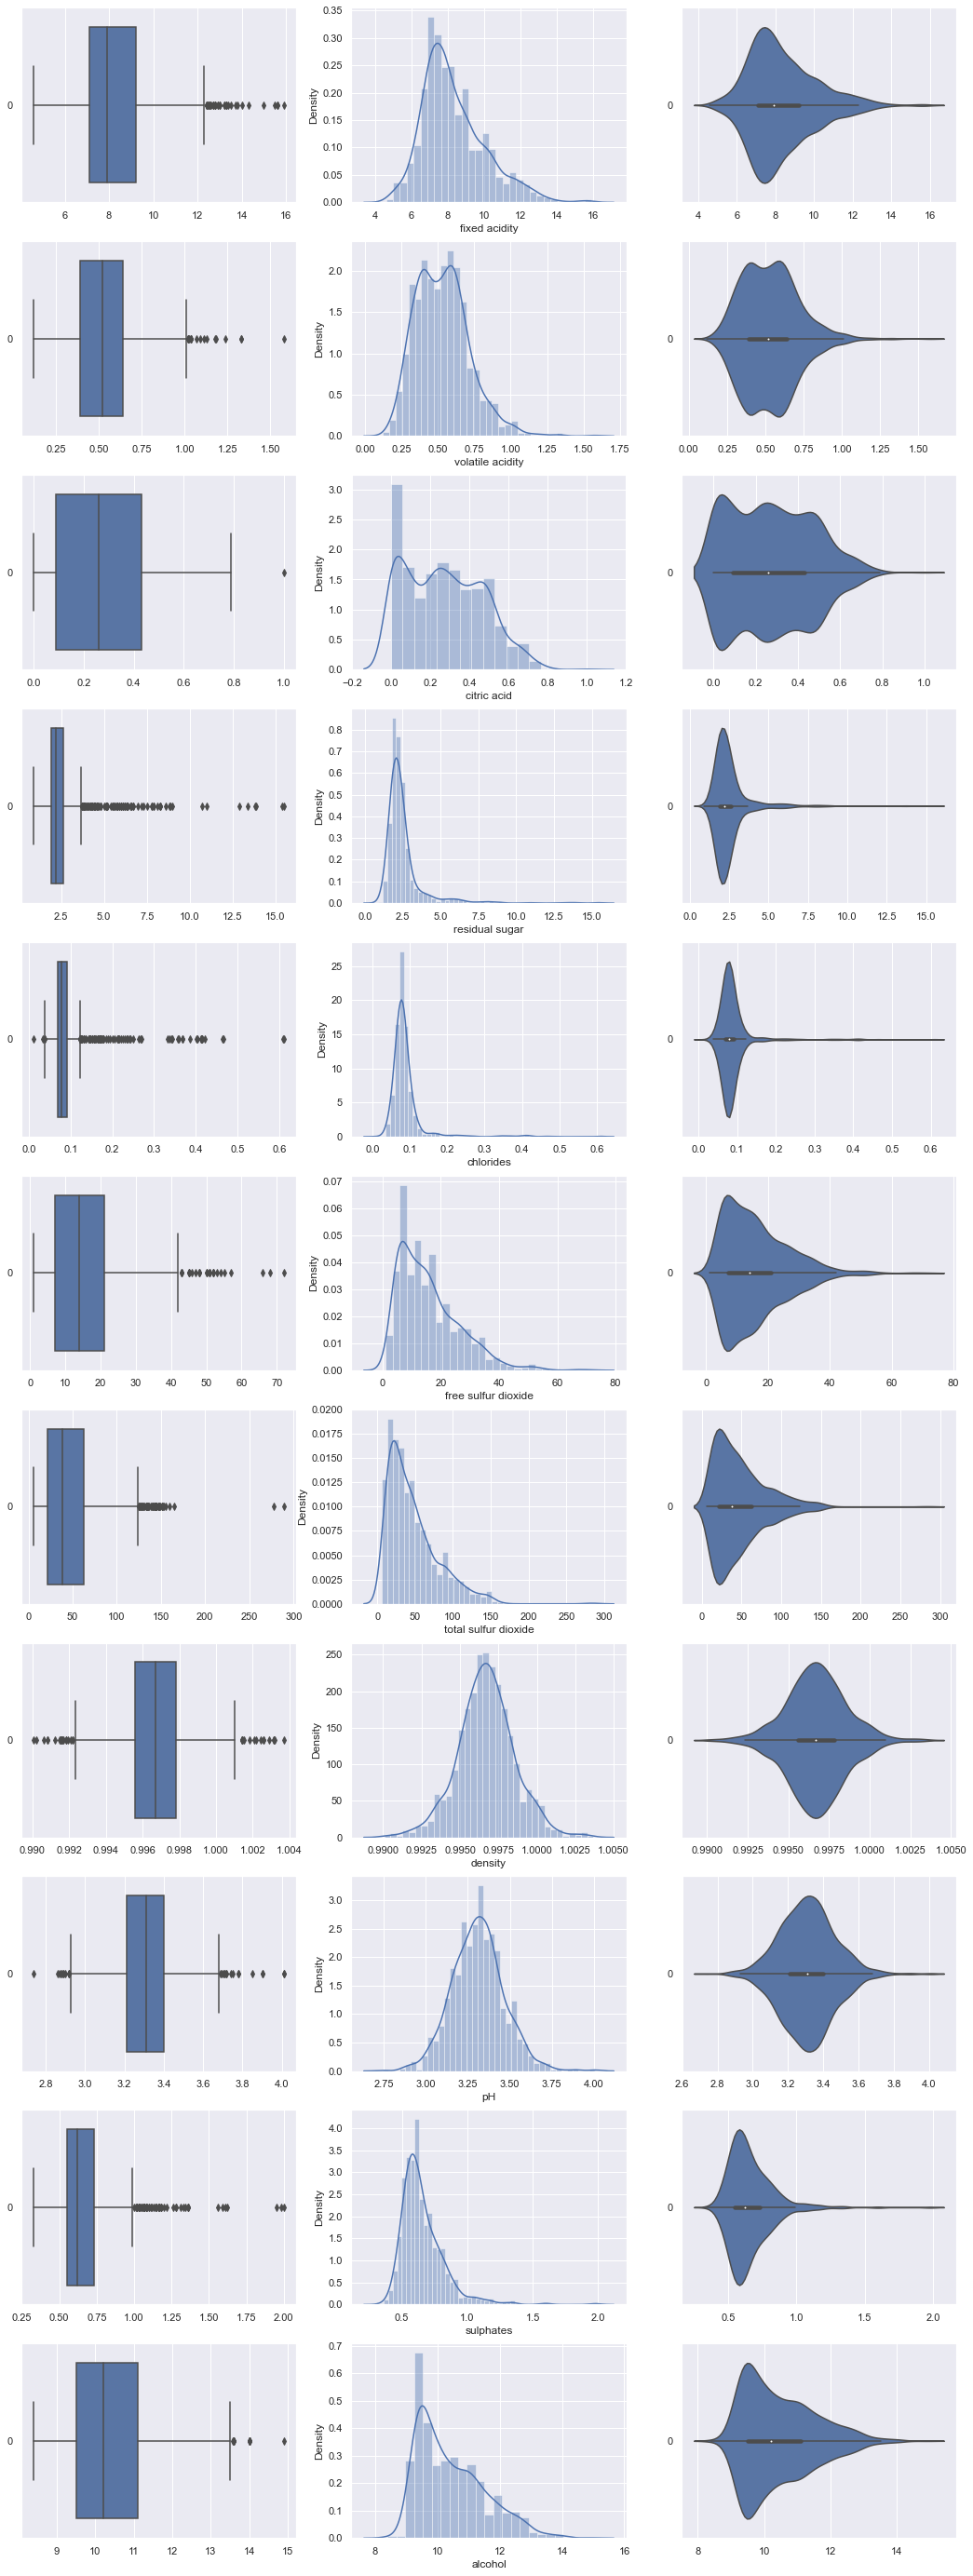

In [32]:
listOfVariables = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
f, axes = plt.subplots(len(listOfVariables), 3, figsize=(18, 50))

count = 0
for var in listOfVariables:
    sns.boxplot(data = wine_data[var], orient = "h", ax = axes[count,0])
    sns.distplot(wine_data[var], ax = axes[count,1])
    sns.violinplot(data = wine_data[var], orient = "h", ax = axes[count,2])
    count += 1

Then, for each of these variables, we plot a violinplot for each quality category. This is to observe if there is any trend or relationship between the variable and the alcohol quality.  For example, we can observe that `higher alcohol quality`correspond with `higher median alcohol levels`.

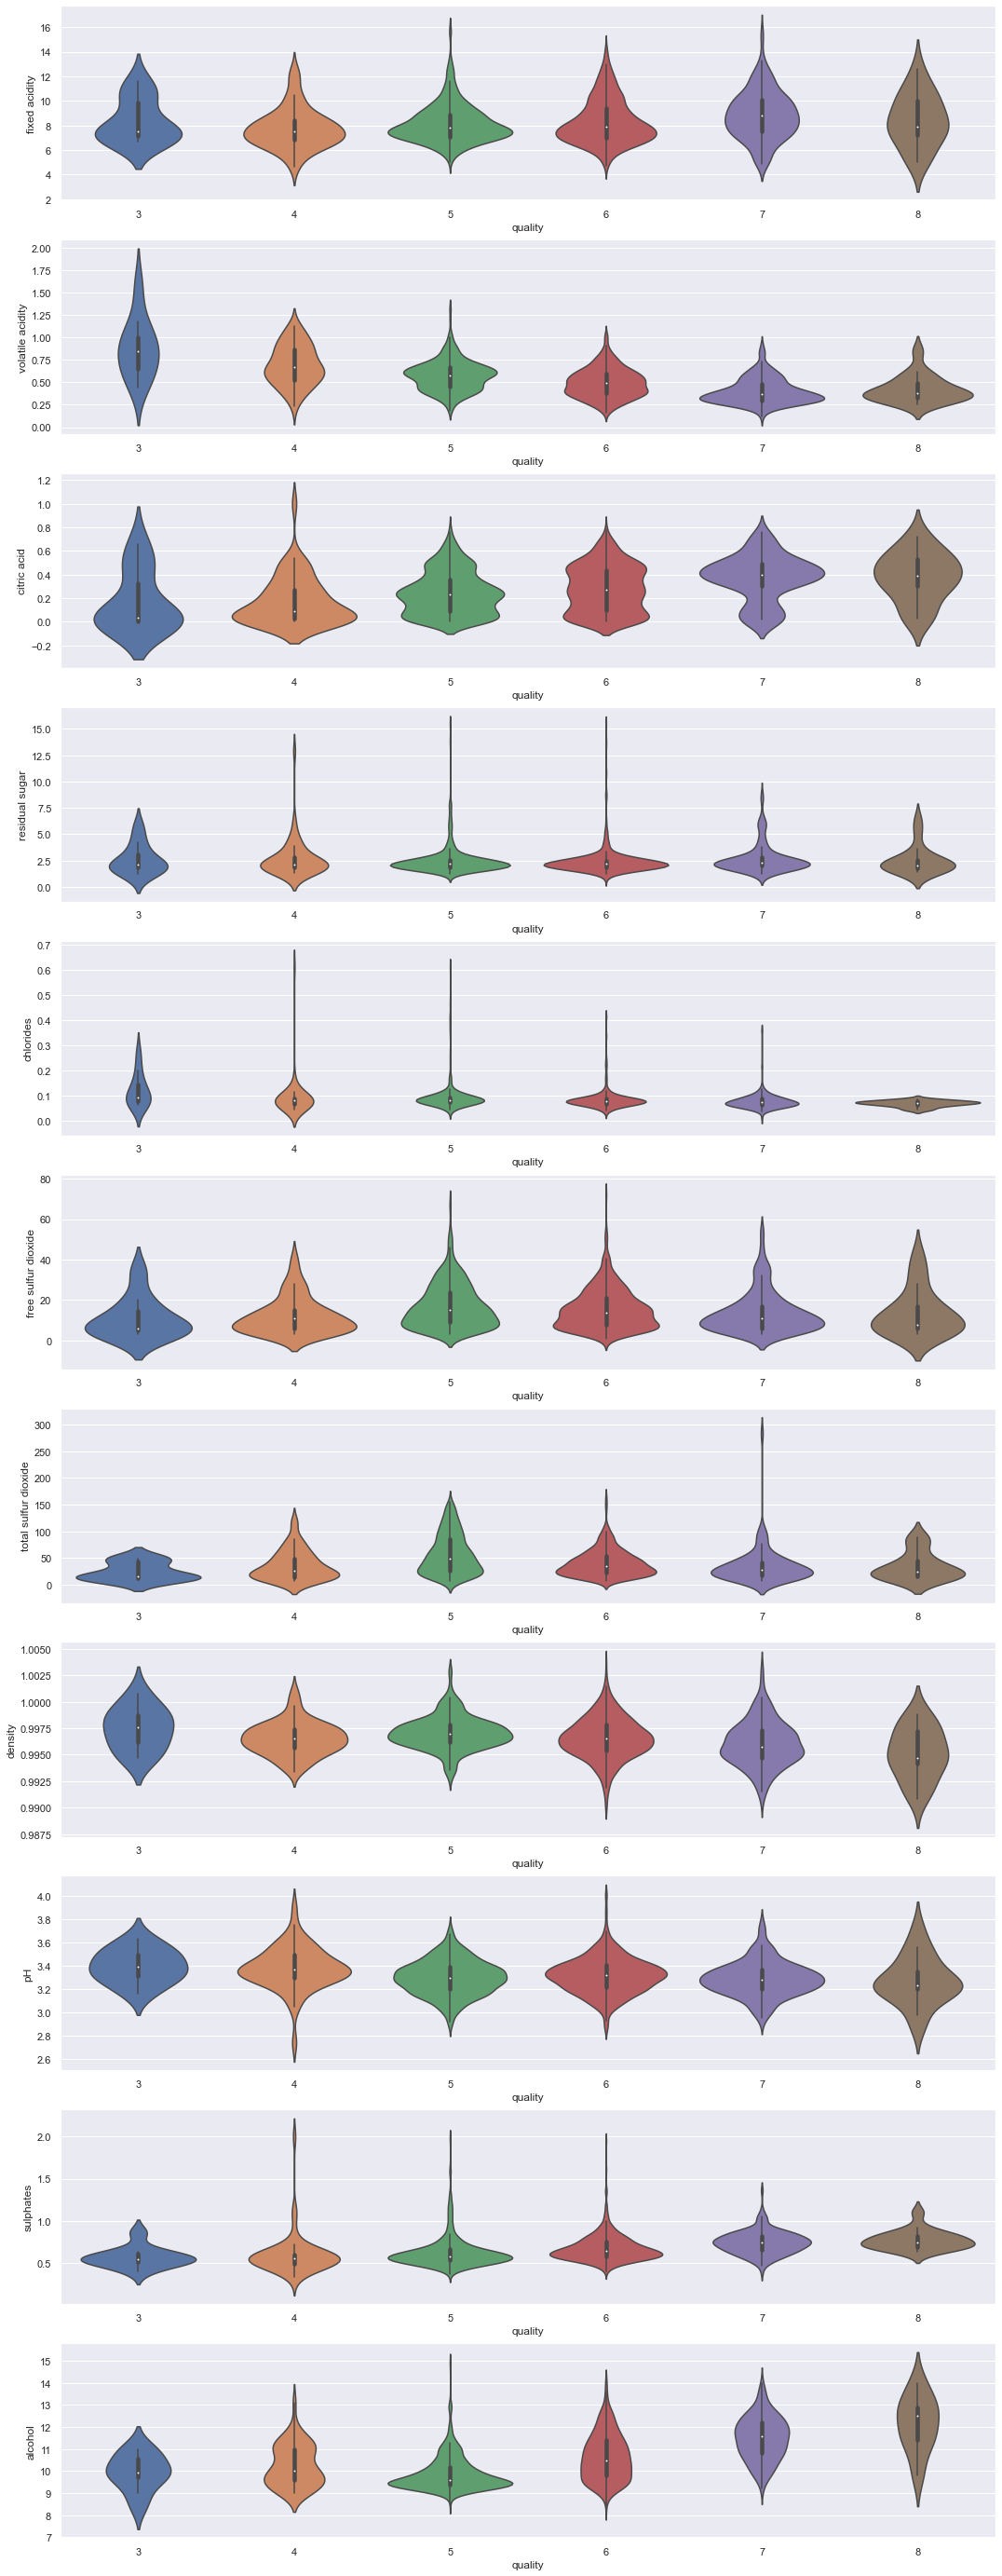

In [33]:
listOfVariables = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
f, axes = plt.subplots(len(listOfVariables), figsize=(18, 50))
count = 0
for var in listOfVariables:
    sns.violinplot(data=wine_data, x='quality', y=listOfVariables[count], ax = axes[count])
    count+=1

Next, we plot a pairplot to show pairwise relationships between every pair of variables. This helps to show if there is any possible linear relationship between the variables.

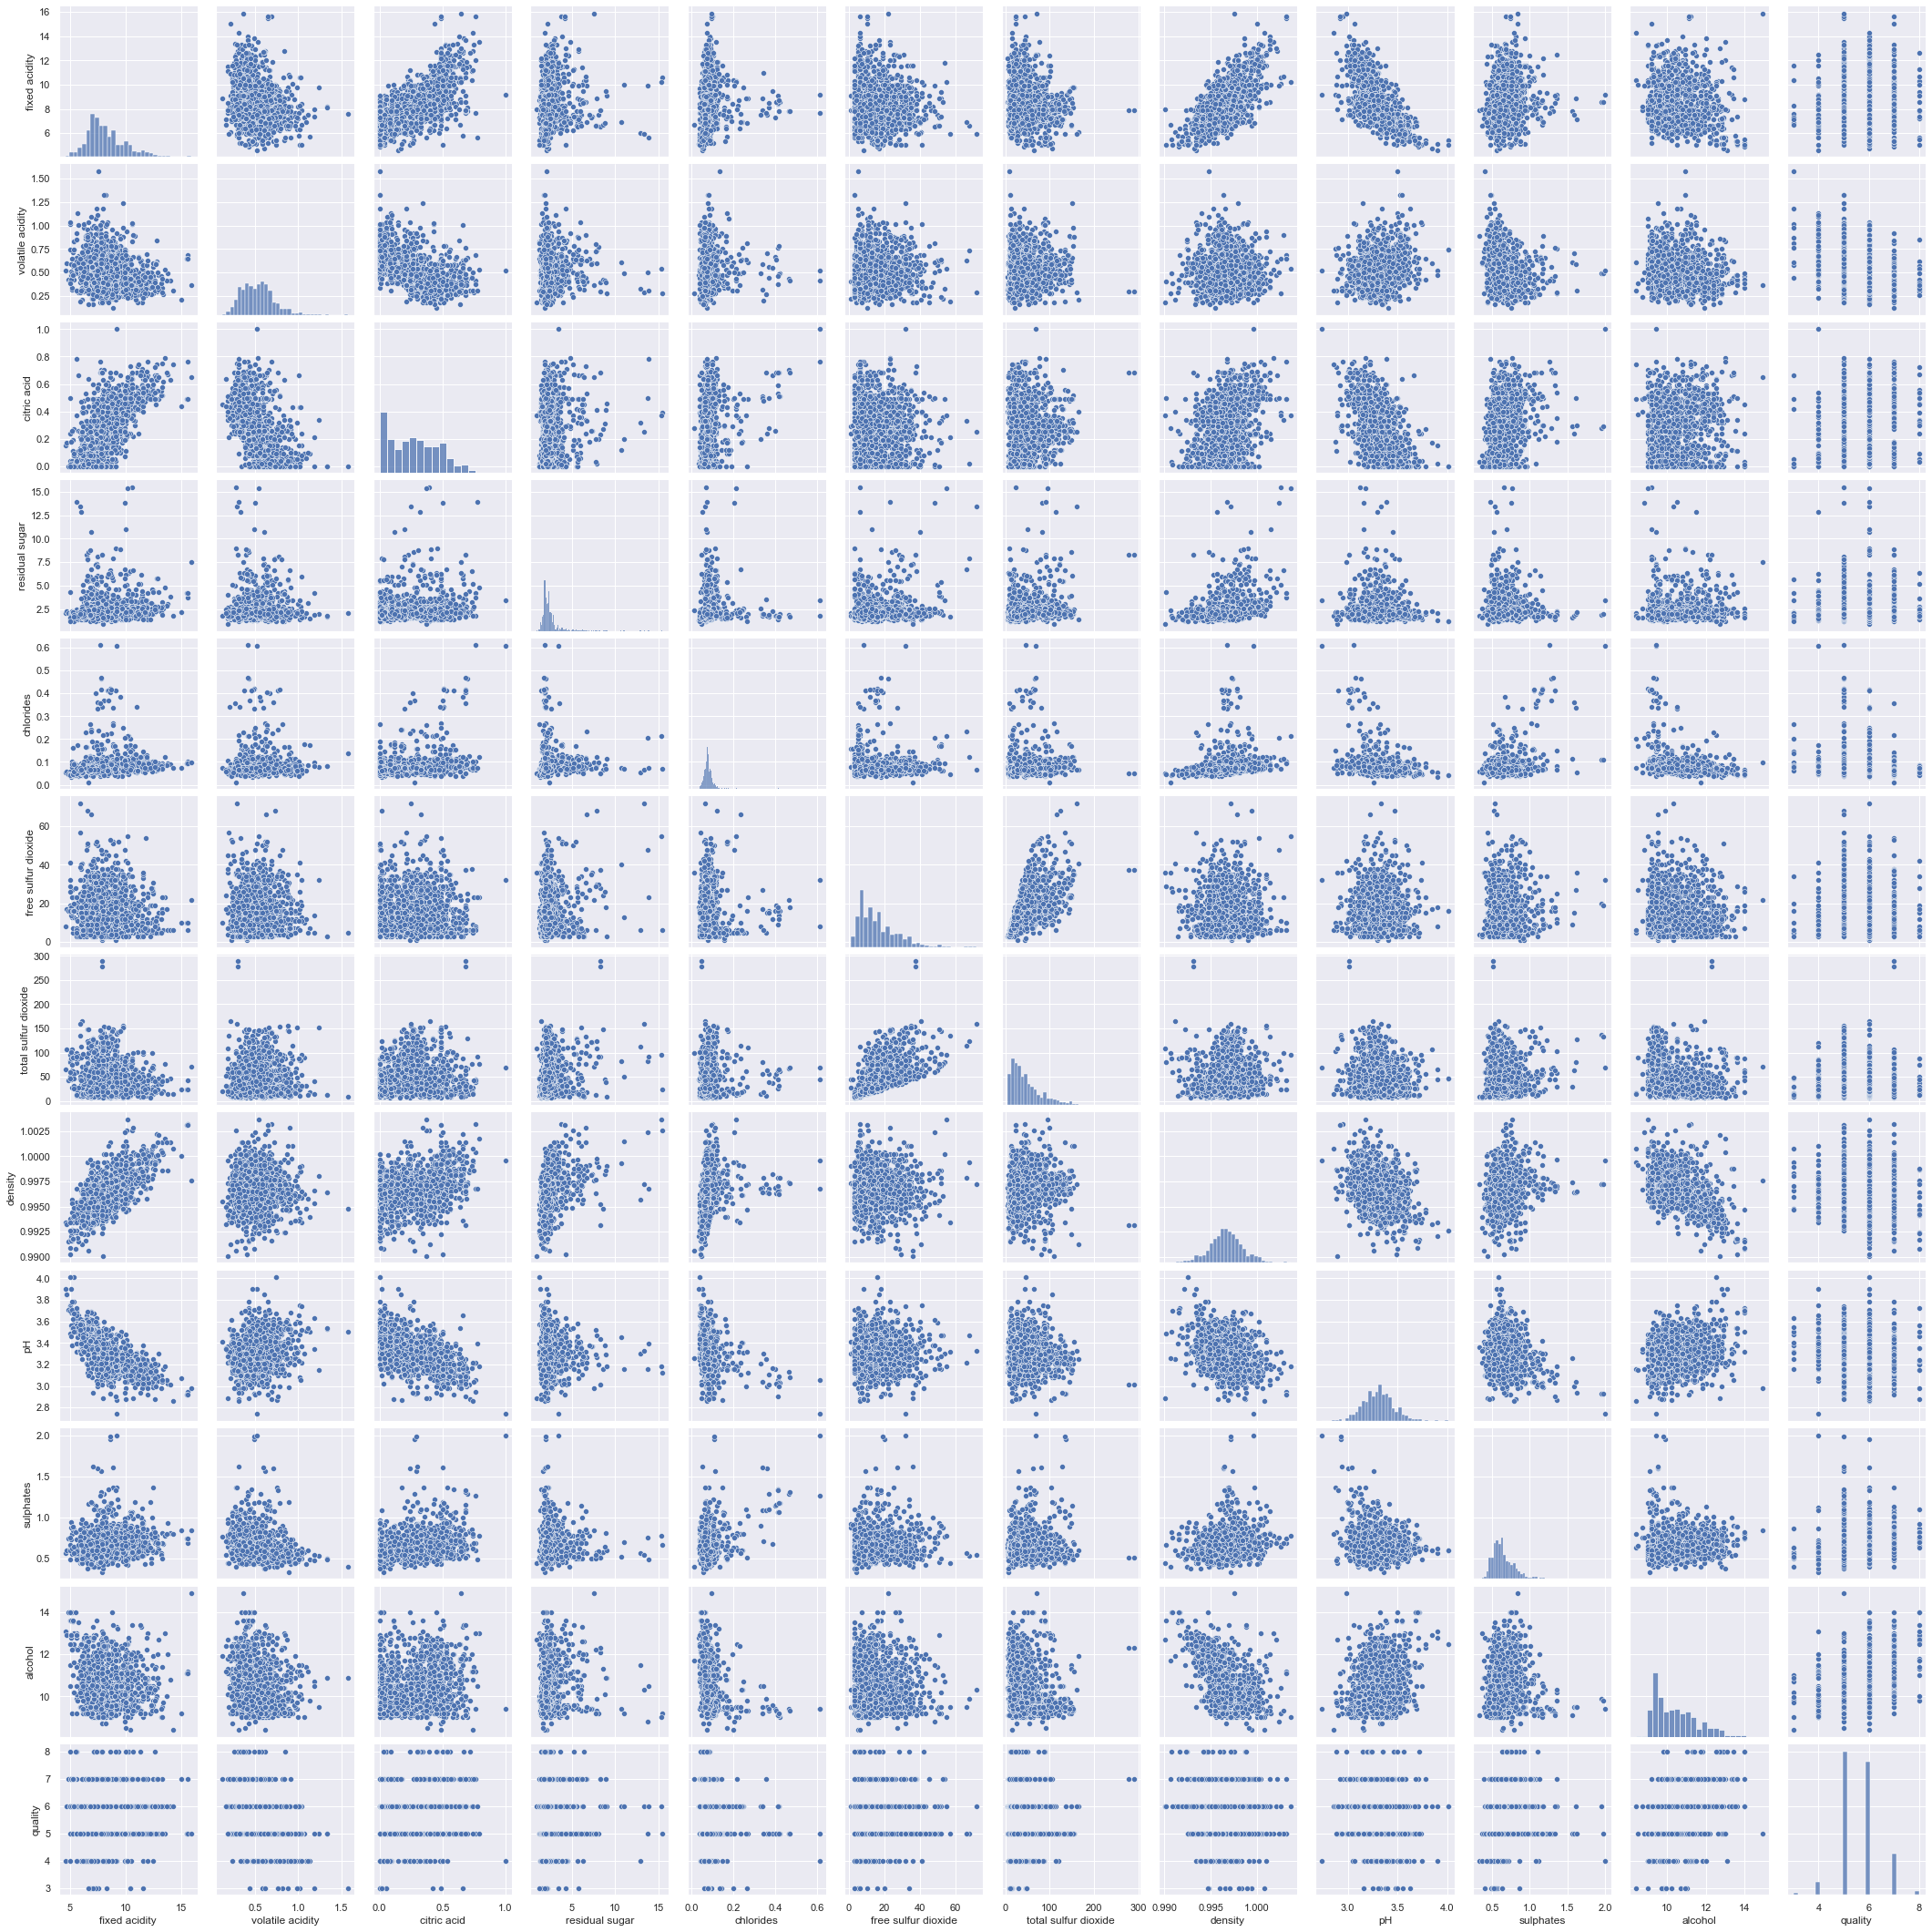

In [34]:
sns.pairplot(data = wine_data)

plt.show()

## Multiclass Classification to Binary Classification

We note that most of the rows in the dataset have a quality score 5 or 6. Quality scores below 3 or above 8 are not represented in this dataset, which makes it hard to predict underrepresented bins. Hence, here we fit the quality score into two bins, to consider only 'bad' and 'good' wines (0 and 1).

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])

wine_data['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

We can now look at the new value counts of the quality of our wine data. (0 denotes 'bad' wine, 1 denotes 'good' wine)

([<matplotlib.axis.XTick at 0x1e434096b20>,
 <a list of 2 Text major ticklabel objects>)

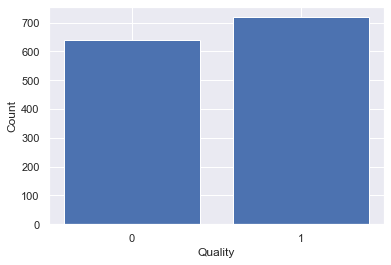

In [18]:
plt.bar(x = wine_data['quality'].value_counts().index.tolist(), 
        height = wine_data['quality'].value_counts().array)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks([0,1])


#### Comparing the variables against 'good' and 'bad' wines

We plot a boxplot, distribution plot, and violinplot for each variable. The boxplot compares the levels of each variable between the 'bad' wines and the 'good' wines. The distribution plot and the violinplot shows us how each variable is distributed along its range of values.

From the boxplots, we note that variables such as 'alcohol' may have a relationship with wine quality. 'Good' wines have a higher median alcohol level, compared to 'bad' wines, for instance. On the other hand, variables such as 'pH' do not seem to affect the perception of whether a wine is 'good' or 'bad'.

From the distribution plots and violinplots, we note that some variables seem to follow a normal distribution across all wines, such as 'chlorides', while variables like 'citric acid' do not follow a normal distribution.

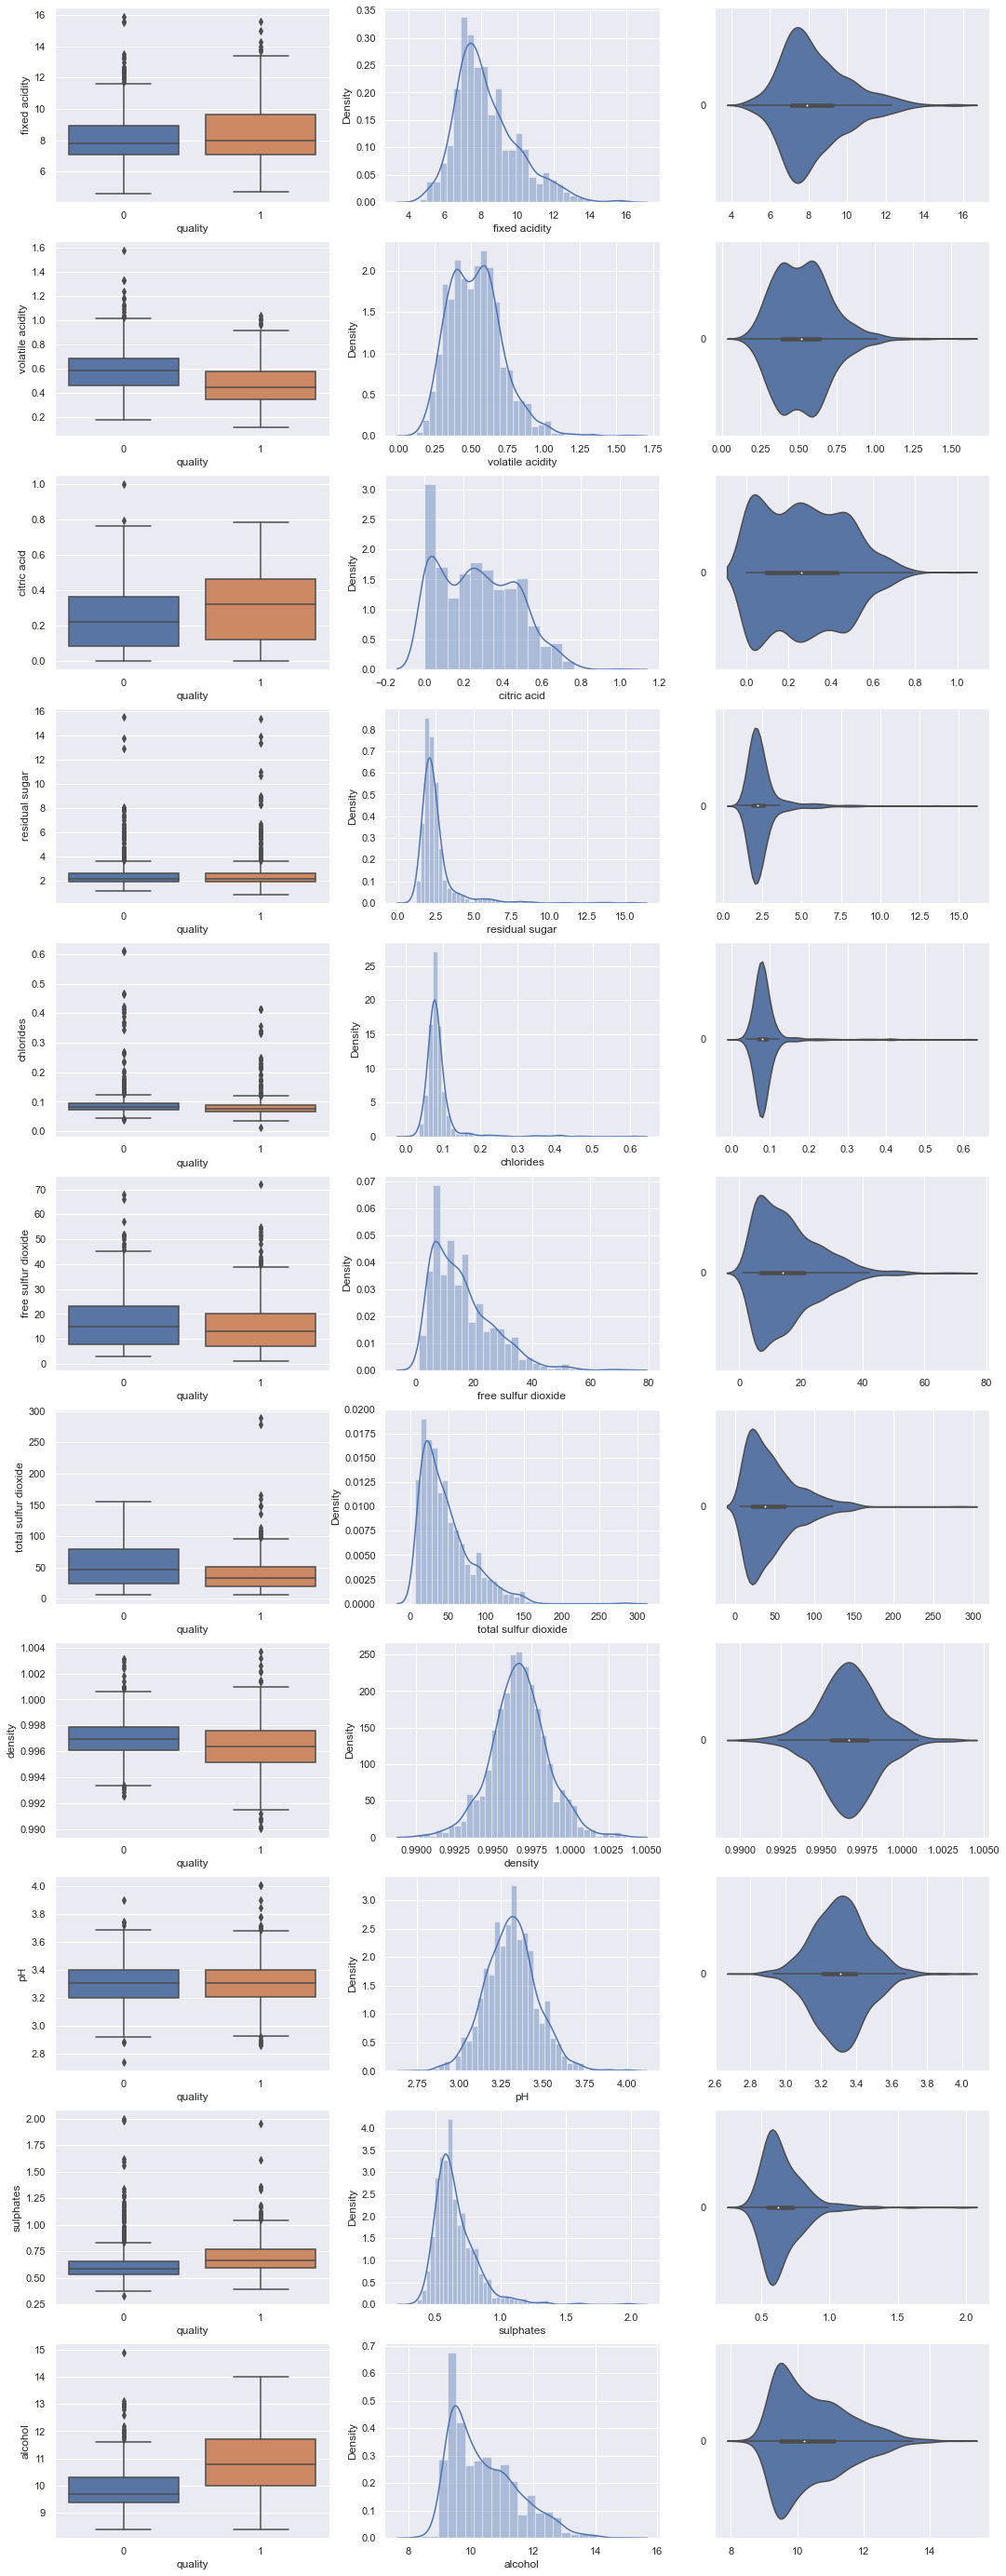

In [48]:
listOfVariables = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
f, axes = plt.subplots(len(listOfVariables), 3, figsize=(18, 50))
count = 0
for var in listOfVariables:
    sns.boxplot(data=wine_data, x='quality', y=listOfVariables[count], ax = axes[count, 0])
    sns.distplot(wine_data[var], ax = axes[count,1])
    sns.violinplot(data = wine_data[var], orient = "h", ax = axes[count,2])
    count+=1

Now, we export the binned dataset with no duplicates into a .csv file to do further analysis on the effects on model accuracy on the following:
1. Outlier removal
2. Feature selection

In [49]:
wine_data.to_csv('binned_no_dup.csv', index=False)